In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np
import seaborn as sns
import requests 

In [62]:
import random
def hexAl():
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])]
#     print(color)
    return color[0]
def grafLocation(df):
    corrloc =df.groupby(df.location).count()
    c4=corrloc.university>5
    n =corrloc[c4]
    colores = [hexAl() for i in range(len(n))]
    corrloc[c4].university.plot(kind="bar", color = colores,fontsize=20)
    plt.title(f'Inscription by {df.location.name} > 5 in {df.university[0]}', fontsize=15)
    plt.show()
    ma= corrloc[c4]
    ma.index
    ma.max()
    f =ma.age == ma.age.max()
    name_L=ma[f].index[0]
    loca =df1.location == ma[f].index[0]
    grupoL =df1[loca]
    N = len(grupoL)
    colores = [hexAl() for i in range(N)]
    grupoL.university.groupby(grupoL.inscmonth).count().plot(kind="bar",color = colores,fontsize=20)
    plt.title(f'Inscription by {df.location.name} > 5 in {df.university[0]} by {df.inscmonth.name}', fontsize=15)
    plt.show()
    grafBar(grupoL.career, name_L)
    grafBar(grupoL.age, name_L)
    grafBox(grupoL.gender,grupoL.age, name_L)
    grafPie(grupoL,grupoL.age, name_L)
    grafPie(grupoL,grupoL.gender, name_L)
    grafPie(grupoL,grupoL.career, name_L)
    graf3Rel(grupoL,grupoL.career,grupoL.age,grupoL.gender)
    
    
    
def grafPie(dfD,dfg,location=""):
    total_precio = dfD.groupby(dfg).count()
    colors = sns.color_palette('pastel')[0:6]
    co = total_precio.columns[0]
    plt.pie(total_precio[co],labels=total_precio.index, colors = colors,
    autopct='%.0f%%')
    plt.title(f"Inscription by {dfg.name}: {location}")
    plt.show()

#     total_precio = dfD.groupby(dfg).count()
#     print(total_precio)
#     etiquetas = total_precio.index()
# #     print()
#     colors = sns.color_palette('pastel')[0:6]
#     plt.pie(total_precio, labels = etiquetas, colors = colors,
#     autopct='%.0f%%')
#     plt.title(f"Inscription by {dfg.name}: {location}")
#     plt.show()
 

    
def grafBar(data,location=""):
    fig = plt.figure(figsize = (10,5))
    plt.title(f"Inscription by {data.name}: {location}")
    sns.countplot(data, order = data.value_counts().index)
    plt.xticks(rotation=90)
    plt.show()


    
def graf3Rel(df,xd,yd,zd):
    
    sns.relplot(x=xd ,y=yd,hue=zd,data=df)
    plt.title(f"Inscription by {df.university.unique()[0]}")
    plt.xticks(rotation=90)
    plt.show()

    
def grafBox(var1,var2, location=""):
    plt.title(f"Inscription by {var1.name}:{var2.name}:{location}")
    sns.boxplot(x=var1,y=var2)
    plt.xticks(rotation=90)
    plt.show()
    
    
def url_todf(url):
    df = pd.read_html(url)
    df =df[0][1]
    df =df.str.split("\t")
    li =df.to_list()
    df1 = pd.DataFrame(li[1:],columns=li[0])
    return df1

In [82]:
url1 = "https://github.com/dipaolme/Skill-Up-DA-c-Python/blob/grupoB/datasets/GBUNComahue_process.txt"
url2 = "https://github.com/dipaolme/Skill-Up-DA-c-Python/blob/grupoB/datasets/GBUNSalvador_process.txt"

df1 = url_todf(url1)
df2 = url_todf(url2)



In [83]:
df1.dtypes

university          object
career              object
inscription_date    object
first_name          object
last_name           object
gender              object
age                 object
postal_code         object
location            object
email               object
dtype: object

In [84]:
df1.inscription_date =pd.to_datetime(df1['inscription_date'], format='%Y-%m-%d')

In [67]:
# data ="GBUNComahue_process.txt"

# df = pd.read_csv(data,sep="\t")


# df.career

' licenciatura en ciencia política'

In [71]:
df1

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,univ. nacional del comahue,licenciatura en psicología,2020-09-01,gregory,howell,male,19,5315,calera la norma,frankalexandra@yahoo.com
1,univ. nacional del comahue,farmacia,2020-09-01,tasha,brown,female,37,8305,aguada san roque,tedwards@gmail.com
2,univ. nacional del comahue,medicina,2020-09-01,ian,taylor,male,17,3428,estacion saladas,richard76@gmail.com
3,univ. nacional del comahue,medicina,2020-09-01,mark,sanchez,male,20,5873,isla,oduffy@yahoo.com
4,univ. nacional del comahue,licenciatura en ciencia política,2020-09-01,sherri,carter,female,29,1765,isidro casanova,fosterchase@gmail.com
...,...,...,...,...,...,...,...,...,...,...
1826,univ. nacional del comahue,técnico para bioterios,2021-02-01,keith,richardson,male,17,3466,abalo,kingjoseph@yahoo.com
1827,univ. nacional del comahue,licenciatura en ciencias biológicas,2021-02-01,richard,robles,male,29,8324,cipolletti,kylegraham@hotmail.com
1828,univ. nacional del comahue,licenciatura en artes,2021-02-01,stephanie,williams,female,19,5471,agua blanca,jvaldez@hotmail.com
1829,univ. nacional del comahue,diseño industrial,2021-02-01,jennifer,cohen,female,38,4157,arroyo mal paso,rramirez@hotmail.com


In [92]:
dfg=pd.get_dummies(data=df1, columns=['gender'])


df1.inscription_date = pd.to_datetime(df1.inscription_date)
# dfk = pd.DataFrame(pd.date_range('2000-01-02', freq='1M', periods=15), columns=['Date'])
df1.inscription_date =pd.to_datetime(df1['inscription_date'], format='%Y-%m-%d')
bins_dt = pd.date_range('2020-08-01' , freq='1M', periods=7)
bins_str = bins_dt.astype(str).values

labels = ['{}'.format( bins_str[i]) for i in range(1, len(bins_str))]
df1['inscmonth']=pd.cut(df1.inscription_date,
                   bins=bins_dt,
                   labels=labels)

df1
dfg['inscmonth']=pd.cut(df1.inscription_date,
                   bins=bins_dt,
                   labels=labels)

In [257]:
# 

In [78]:
df2.dtypes

university          object
career              object
inscription_date    object
first_name          object
last_name           object
gender              object
age                 object
postal_code         object
location            object
email               object
dtype: object

In [72]:
df1 = df1.copy()
df2 = df2.copy()

In [85]:



dft=pd.get_dummies(data=df2, columns=['gender'])
df2.inscription_date = pd.to_datetime(df2.inscription_date)
# dfk = pd.DataFrame(pd.date_range('2000-01-02', freq='1M', periods=15), columns=['Date'])
df2.inscription_date =pd.to_datetime(df2['inscription_date'], format='%Y-%m-%d')
bins_dt = pd.date_range('2020-08-01' , freq='1M', periods=7)
bins_str = bins_dt.astype(str).values
labels = ['{}'.format( bins_str[i]) for i in range(1, len(bins_str))]
df2['inscmonth']=pd.cut(df2.inscription_date,
                   bins=bins_dt,
                   labels=labels)

df1
dft['inscmonth']=pd.cut(df2.inscription_date,
                   bins=bins_dt,
                   labels=labels)
df2

ParserError: Unknown string format: kim

In [ ]:

# df3=pd.get_dummies(data=df1, columns=['career','gender','location'])

dfc=dfg.groupby(['career']).mean()
dfc=dfg.groupby(['career']).count()
dfa=dfg.groupby(['age']).count()
dfl=dfg.groupby(['location']).mean()
dfI=dfg.groupby(['inscription_date']).mean()

dfcp = df1.groupby(df1.postal_code).count()

dfc

dfc =dfg.university.groupby(df1.career).count()
# dfc

In [ ]:
# dfcg  =df1.university.groupby([df1.career,df1.gender,df1.age]).count().plot(kind="bar")


# General
## Comportamiento por universidad

Grafícas de barras, pie, relación a 3 variables , para cada universidad 


# Univerdidad Grupo B Comahue

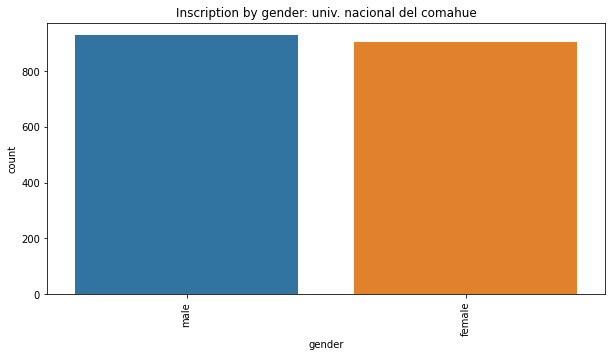

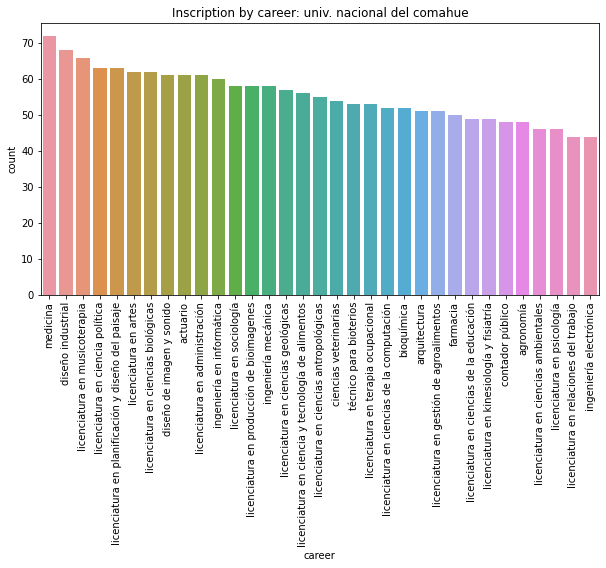

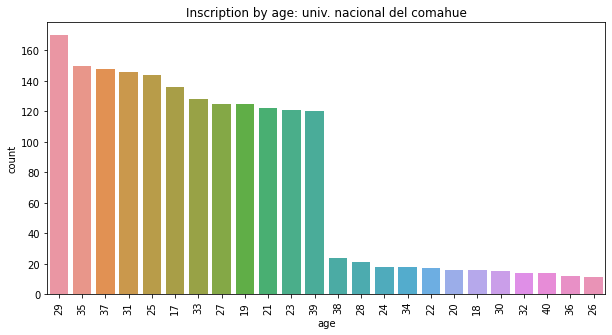

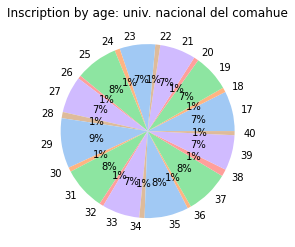

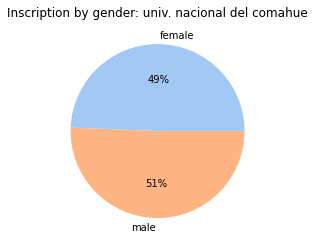

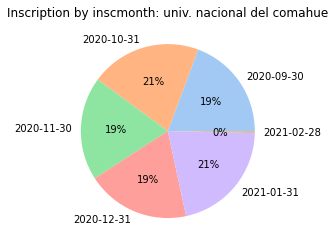

TypeError: Neither the `x` nor `y` variable appears to be numeric.

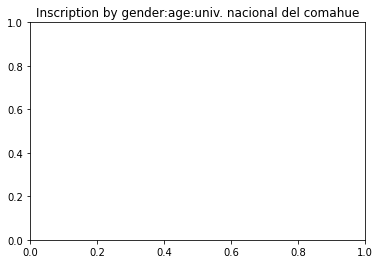

In [74]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#  Bar
grafBar(df1.gender,df1.university[0])
grafBar(df1.career,df1.university[0])
grafBar(df1.age,df1.university[0])
#  Pie
grafPie(df1,df1.age,df1.university[0])
grafPie(df1,df1.gender,df1.university[0])
grafPie(df1,df1.inscmonth,df1.university[0])
# Box
grafBox(df1.gender,df1.age,df1.university[0])
grafBox(df1.career,df1.age,df1.university[0])

#  Location 
grafLocation(df1)

# Universidad Grupo B salvador


In [ ]:
#  Bar
grafBar(df2.gender,df2.university[0])
grafBar(df2.career,df2.university[0])
grafBar(df2.age,df2.university[0])
#  Pie
grafPie(df2,df2.age,df2.university[0])
grafPie(df2,df2.gender,df2.university[0])
grafPie(df2,df2.inscmonth,df2.university[0])
# Box
grafBox(df2.gender,df2.age,df2.university[0])
grafBox(df2.career,df2.age,df2.university[0])

#  Location 
grafLocation(df2)


In [ ]:
dfg1=pd.get_dummies(data=dfg, columns=['career'])
dft2=pd.get_dummies(data=dft, columns=['career'])

In [ ]:
# dfg1

In [ ]:
# dft2

In [ ]:
correlacion1 = dfg1.corr()
# correlacion
correlacion1

In [ ]:
correlacion[0:5]

In [ ]:
correlacion2 = dft2.corr()
# correlacion
correlacion2
# sns.heatmap(correlacion[0:5],xticklabels=correlacion.columns[0:5],yticklabels=correlacion.columns[0:5],annot=True)
# plt.show()

In [ ]:
correlacion2[0:5]

In [ ]:
grafBar(df1.gender,df1.university[0])
grafBar(df2.gender,df2.university[0])

In [ ]:
grafBox(df1.gender,df1.age,df1.university[0])
grafBox(df2.gender,df2.age,df2.university[0])

In [ ]:
grafPie(df1,df1.gender,df1.university[0])
grafPie(df2,df2.gender,df2.university[0])





In [ ]:
# total_precio = df2.groupby(df2.gender).count()
# print(total_precio)
# #     etiquetas = dfg.unique()
# # l=list(total_precio['university'].index.sort_values())
# label =total_precio['age'].sort_values()

# label.index
# total_precio.age
# # total_precio['age'].index


In [ ]:
co = total_precio.columns[0]


total_precio[co]

In [ ]:
total_precio = df1.groupby(df1.gender).count()

colors = sns.color_palette('pastel')[0:6]
# plt.pie(total_precio.columns[0],labels=total_precio.index, colors = colors,
# autopct='%.0f%%')
# # plt.title(f"Inscription by {dfg.name}: {location}")
# plt.show()

In [ ]:
total_precio.columns[0]


In [ ]:
904/len(df1)*100

df1.gender.unique()

In [ ]:
grafPie(df1,df1.inscmonth,df1.university[0])
grafPie(df2,df2.inscmonth,df2.university[0])

In [ ]:
grafPie(df1,df1.age,df1.university[0])
grafPie(df2,df2.age,df2.university[0])

In [ ]:
grafBox(df1.career,df1.age,df1.university[0])
grafBox(df2.career,df2.age,df2.university[0])


In [ ]:
grafBar(df1.career,df1.university[0])
grafBar(df2.career,df2.university[0])

In [ ]:
grafBar(df1.age,df1.university[0])
grafBar(df2.age,df2.university[0])

In [ ]:
graf3Rel(df1,df1.career,df1.age,df1.gender)
graf3Rel(df2,df2.career,df2.age,df2.gender)

In [ ]:
grafLocation(df1)




In [ ]:
df1.university.unique()[0]

In [ ]:
grafLocation(df2)

In [ ]:
dfg1.describe()

In [ ]:
dft2.describe()

In [ ]:
df1.career.groupby([df1.career,df1.age,df1.gender]).describe()




In [ ]:
df2.career.groupby([df2.career,df2.age,df2.gender]).describe()

In [ ]:
dif = len(df2)-len(df1)
dif

In [ ]:
dif/len(df2)*100

In [ ]:
ma=df1.university.groupby(df1.age).describe()

# dat['count'].unique()
f =ma['count'] == ma['count'].max()
name_L=ma[f].index[0]
# loca =df1.location == ma[f].index[0]
name_L
ma
print(df1.university[0])
print(name_L, ma['count'].max())


In [ ]:
ma

In [ ]:
EdT1=ma.sum()
ma
ma[ma.index > 27].sum()
ma[ma.index > 27].sum()[0]/ma.sum()[0]*100

# len(df1)


In [ ]:
ma=df2.university.groupby(df2.age).describe()

# dat['count'].unique()
f =ma['count'] == ma['count'].max()
name_L=ma[f].index[0]
# loca =df1.location == ma[f].index[0]
name_L
print(df2.university[0])
print(name_L, ma['count'].max())

In [ ]:
EdadT2=ma.sum()
ma

In [ ]:
ma[ma.index > 27].sum()[0]/ma.sum()[0]*100

In [ ]:
# ma=df1.university.groupby(df1.location).describe()

In [ ]:
df2.university.groupby(df2.career).count().max()

# Conclusión

- La mayor parte de la población inscrita entre 2020-09-01 e inicios 2021-02-01, es de mujeres con un 52% para la universidad del Salvador, a diferencia de la  universidad comanhue donde su mayor población es de hombres con un 51%, la universidad del salvador solo tiene 73 personas inscritas mas que la universidad de comenhue equivalente a un 4 % aproximadamente, 
- La edad promedio de los inscritos se encuentra entre los 27 y 28 años, aunque la mayor cantidad de inscritos en el periodo de tiempo establecido tienen la edad de 23 años para ambas universidades, la edad minima esta en 17 años y la maxima en 40 años, además la universidad de comenhue tiene su mayor población mayor a 27 años con un valor del 50% a diferencia de la universidad del salvador con un 40.5 % , por tanto la universidad del salvador tiene personas más jovenes.
- La mayor población que provienen de una misma localidad es de 12 para la universidad de comahue para la localidad de 25 de mayo, y de 10 para la universidad del Salvador para la localidad agua colorada, al realizar las gráficas realizadas al dataset general, se observo que el mismo comportamiento  para el genero de inscripciones tomando la tendencia general de los datos, la elección de carrera presenta gran variedad por localidad ,edad, y genero como se observa en el grafíco que relaciona la edad, carrera y genero.